In [1]:
import base64
import io
import os
import sys
from io import BytesIO
from time import time
from typing import Union

import PIL
from langchain_core.documents import Document
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from PIL import Image

project_root = "/home/thangquang/CODE/multimodal-rag-baseline"

if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Đã thêm vào sys.path: {project_root}")
else:
    print(f"Đường dẫn {project_root} đã có trong sys.path.")


Đã thêm vào sys.path: /home/thangquang/CODE/multimodal-rag-baseline


In [2]:
!wget -O anh-con-cho-51.jpg https://hoanghamobile.com/tin-tuc/wp-content/uploads/2024/04/anh-con-cho-51.jpg

--2025-05-07 23:14:45--  https://hoanghamobile.com/tin-tuc/wp-content/uploads/2024/04/anh-con-cho-51.jpg
Resolving hoanghamobile.com (hoanghamobile.com)... 103.28.37.130
Connecting to hoanghamobile.com (hoanghamobile.com)|103.28.37.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125309 (122K) [image/jpeg]
Saving to: ‘anh-con-cho-51.jpg.1’

anh-con-cho-51.jpg. 100%[===================>] 122.37K  --.-KB/s    in 0.05s   

2025-05-07 23:14:45 (2.32 MB/s) - ‘anh-con-cho-51.jpg.1’ saved [125309/125309]



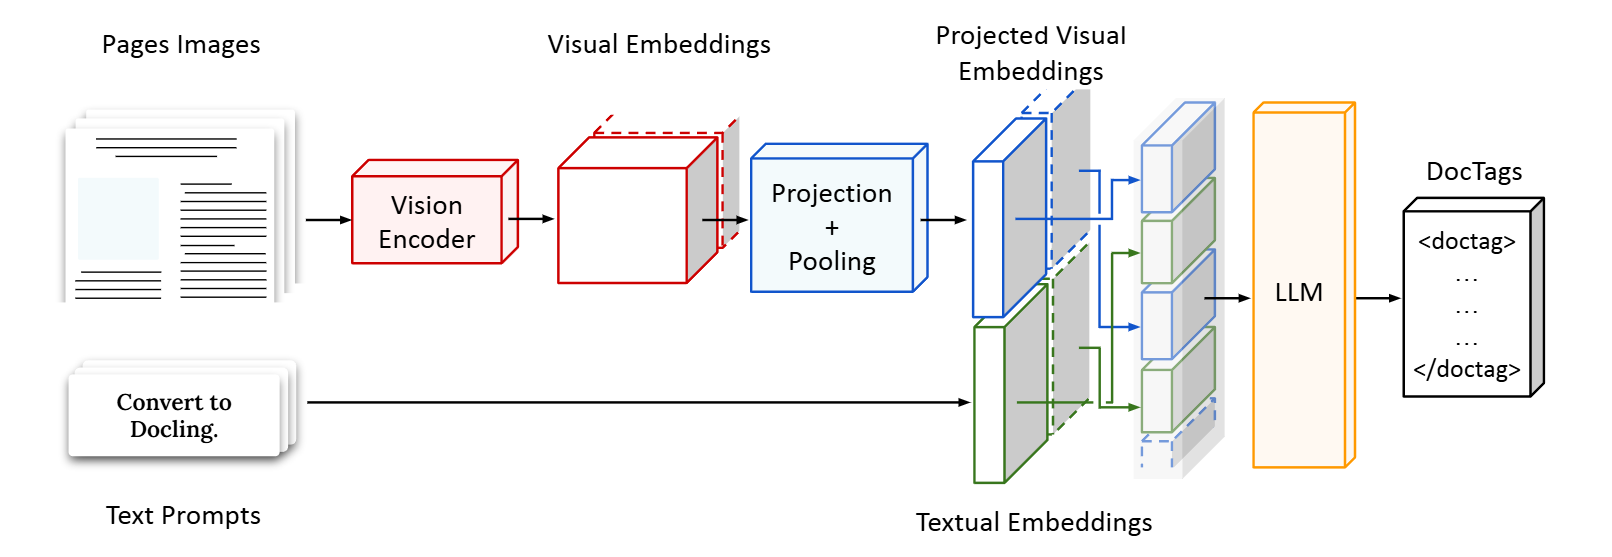

In [9]:
from IPython.display import display
from utils.image_caption import get_image_base64

img_path = "image.png"
img = Image.open(img_path)

display(img)

## With Gemini

In [10]:
from utils.image_caption import generate_caption_with_gemini

In [11]:
print(generate_caption_with_gemini(image_path=img_path))

INFO:utils.image_caption:Step 'get_llm_vision_gemini' took 0.0286 seconds


INFO:utils.image_caption:Sending Request
INFO:utils.image_caption:Step 'generate_caption_with_gemini' took 1.9571 seconds


A diagram illustrating a process of converting pages images and text prompts into DocTags using a vision encoder, projection and pooling, textual embeddings, and an LLM.


## With Local Model

In [8]:
from huggingface_hub import notebook_login

notebook_login()

In [12]:
from utils.image_caption import get_llm_vision_local

In [19]:
processor, model = get_llm_vision_local(
    checkpoint="Salesforce/blip-image-captioning-base"
)

INFO:utils.image_caption:Loading model from Salesforce/blip-image-captioning-base
INFO:utils.image_caption:Step 'get_llm_vision_local' took 6.3743 seconds


In [20]:
from utils.image_caption import generate_caption_with_local_model

In [21]:
print(
    generate_caption_with_local_model(
        image_path=img_path,
        processor_and_model=(processor, model),
    )
)

INFO:utils.image_caption:Step 'generate_caption_with_local_model' took 1.9634 seconds


a diagram of the process
